In [18]:
import numpy as np
import math


## Test cases

### Given information from the research papers

*(x,y)* = crack coordinate system (global)

*(x',y')* = film (local) coordinate system

*(\{x_0,\y_0})* = origin of film



## Test case for coordinates

In [19]:
#form the local cordinate system let's deduct global coordinate system

x_0=-25
y_0=-25
#print(zero_array)=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
hor_arr=4 #horizontal arrangement of sensors
ver_arr=4 #vertical arrangement of sensors
num_sensors=hor_arr*ver_arr #number of sensors are regular rectangular arrangement 
x_dash = np.zeros(num_sensors)
y_dash = np.zeros(num_sensors)
x = np.zeros(num_sensors)
y = np.zeros(num_sensors)
phi = np.zeros(num_sensors)
beta=0
x_count = 0
y_count = 0
x_dist=0 #distance between sensors
y_dist=0    



      
        

                    

     
    



    

In [20]:
#below is the snip for x_dash, y_dash coordinates w.r.t film C.S.
#np.add(y_dash,y_dist) 
count = 0
for k in range(1,ver_arr+1):
    for l in range(1,hor_arr+1):
        x_dash[count]=0 + x_dist*l
        y_dash[count]=0 + y_dist*k
        count  = count+1        
        




In [21]:
print(x_dash)
print(y_dash) 
#since all the sensors are placed at the origin the test case should prove that the coordinates are at the origin.. Its tested.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
#obtaining global coordinate values
for i in range(0,num_sensors):
    x[i] = x_dash[i]*np.cos(beta)-y_dash[i]*np.sin(beta)+x_0
    y[i] = y_dash[i]*np.sin(beta)+y_dash[i]*np.cos(beta)+y_0 


        

In [23]:
print(x)
print(y)

[-25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25.
 -25. -25.]
[-25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25. -25.
 -25. -25.]


In [24]:
#coordinates of the measuring points (r,phi)
r = np.sqrt(x**2+y**2)
phi = np.arccos(x/r)

In [25]:
print("r",r)

print("phi",phi)

r [35.35533906 35.35533906 35.35533906 35.35533906 35.35533906 35.35533906
 35.35533906 35.35533906 35.35533906 35.35533906 35.35533906 35.35533906
 35.35533906 35.35533906 35.35533906 35.35533906]
phi [2.35619449 2.35619449 2.35619449 2.35619449 2.35619449 2.35619449
 2.35619449 2.35619449 2.35619449 2.35619449 2.35619449 2.35619449
 2.35619449 2.35619449 2.35619449 2.35619449]


### Let's calculate stresses from the following equations:


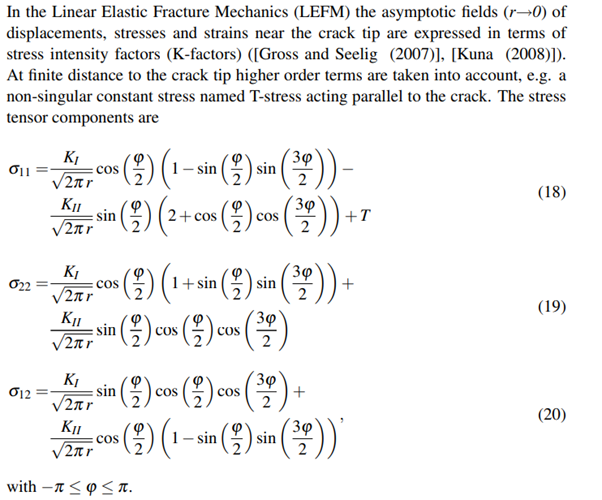


In [10]:
#Values of stress intensity factors extracted from the research journals TableI: Pure Mode I loading
SIF_1 = 508
SIF_2 = 0
T = -20
nu = 0.33
E = 72

## test case for stresses calculation

In [11]:
#stresse tensor components

stress_11 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1-np.sin(phi/2)*np.sin((3*phi)/2))) - ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (2+np.cos(phi/2)*np.cos(3*phi/2))) + T
stress_22 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.cos(phi/2)) * (1+np.sin(phi/2)*np.sin((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.sin(phi/2) * (np.cos(phi/2) * np.cos(3*phi/2)))
stress_12 = ((SIF_1/(np.sqrt(2*np.pi*r))) * (np.sin(phi/2)) * (np.cos(phi/2) * np.cos((3*phi)/2))) + ((SIF_2/(np.sqrt(2*np.pi*r))) * np.cos(phi/2) * (1-(np.sin(phi/2)*np.sin(3*phi/2))))





### it can be observed below that since the sensors are placed at a single location the stresses are same for all the sensors..Hence, Stresses calculations are tested..

In [12]:
print(stress_11, "*********\n\n", stress_22,"**********\n\n", stress_12)




[-2.34525998 -2.34525998 -2.34525998 -2.34525998 -2.34525998 -2.34525998
 -2.34525998 -2.34525998 -2.34525998 -2.34525998 -2.34525998 -2.34525998
 -2.34525998 -2.34525998 -2.34525998 -2.34525998] *********

 [8.43176701 8.43176701 8.43176701 8.43176701 8.43176701 8.43176701
 8.43176701 8.43176701 8.43176701 8.43176701 8.43176701 8.43176701
 8.43176701 8.43176701 8.43176701 8.43176701] **********

 [-11.13311326 -11.13311326 -11.13311326 -11.13311326 -11.13311326
 -11.13311326 -11.13311326 -11.13311326 -11.13311326 -11.13311326
 -11.13311326 -11.13311326 -11.13311326 -11.13311326 -11.13311326
 -11.13311326]


In [13]:
#strains of the specimen
eps_specimen_11 = (stress_11-(nu*stress_22))/E

eps_specimen_22 = (stress_22-(nu*stress_11))/E

eps_specimen_12 = (1+nu)*stress_12/E






#strains of the film
eps_film_11 = (eps_specimen_11 * (np.cos(beta))**2) + (eps_specimen_22 * (np.sin(beta))**2) + (eps_specimen_12 * np.sin(2*beta))

eps_film_22 = (eps_specimen_11 * (np.sin(beta))**2) + (eps_specimen_22 * (np.cos(beta))**2) - (eps_specimen_12 * np.sin(2*(beta))) 

eps_film_12 = (-(eps_specimen_11 - eps_specimen_22) * (np.cos(beta)*np.sin(beta))) + (eps_specimen_12 **2 * ((np.sin(2*beta))**2 - (np.sin(beta))**2)) 

#Combining the numpy arrays for ease
strains_film_specimen = np.column_stack((eps_specimen_11,eps_specimen_22,eps_specimen_12,eps_film_11,eps_film_22,eps_film_12))
strains_film_specimen = np.around(strains_film_specimen,4)



### Similarly, the test case for strains prove that the strains remain same for all the sensors just like the stresses. Strains calculation is tested.

In [14]:
print(eps_specimen_11,"--------------\n\n",eps_specimen_22,"--------------\n\n",eps_specimen_12,"------------\n\n",eps_film_11,"----------\n\n",eps_film_22,"-----------\n\n",eps_film_12)
print("\n Combined strains of film and specimen", strains_film_specimen)

[-0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865
 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865
 -0.07121865 -0.07121865 -0.07121865 -0.07121865] --------------

 [0.12785698 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698
 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698
 0.12785698 0.12785698 0.12785698 0.12785698] --------------

 [-0.20565334 -0.20565334 -0.20565334 -0.20565334 -0.20565334 -0.20565334
 -0.20565334 -0.20565334 -0.20565334 -0.20565334 -0.20565334 -0.20565334
 -0.20565334 -0.20565334 -0.20565334 -0.20565334] ------------

 [-0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865
 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865 -0.07121865
 -0.07121865 -0.07121865 -0.07121865 -0.07121865] ----------

 [0.12785698 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698
 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698 0.12785698
 0.12785698 0.12785698 0.12785698 0.

In [15]:
#combining all the individual arrays for the sensors placed and forming a single array 
stack_arr = np.column_stack((x,y,x_dash,y_dash,r,phi,stress_11,stress_22,stress_12,eps_film_11,eps_film_22,eps_film_12,eps_specimen_11,eps_specimen_22,eps_specimen_12))

In [107]:
#conc_arr = np.concatenate((x,y,x_dash,y_dash,r,phi,stress_11,stress_22,stress_12,eps_film_11,eps_film_22,eps_film_12,eps_specimen_11,eps_specimen_22,eps_specimen_12))

In [16]:
#Rounding off the stacked arrays for ease of understanding
stack_arr = np.round(stack_arr,3)
stack_arr

array([[-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0.   ,  35.355,   2.356,  -2.345,
          8.432, -11.133,  -0.071,   0.128,   0.   ,  -0.071,   0.128,
         -0.206],
       [-25.   , -25.   ,   0.   ,   0. 

In [128]:
#titles = np.array(stack_arr,dtype=[('X_coord', 'f4'),('Y_coord', 'f4'),('X_dash_coord', 'f4'),('Y_dash_coord', 'f4'),('crack_measur_r', 'f4'),('phi', 'f4'),('stress_11', 'f4'),('stress_22', 'f4'),('stress_12', 'f4'),('eps_film_11', 'f4'),('eps_film_22', 'f4'),('eps_film_12', 'f4'),('eps_specimen_11', 'f4'),('eps_specimen_22', 'f4'),('eps_specimen_12', 'f4'), ])

In [17]:
#writing the output into a file
np.savetxt('test_case_1_generated_virtual_data_pure_Mode_I', stack_arr)

